In [1]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

2023-03-02 14:50:59.071403: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Convert pixel values to floats in the range [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Subtract the mean pixel value from each image
mean_pixel = x_train.mean(axis=(0,1,2), keepdims=True)
x_train -= mean_pixel
x_test -= mean_pixel

# Convert labels to one-hot encoding
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [7]:
# RESNET50 model using Keras
model = ResNet50(weights=None, input_shape=x_train.shape[1:], classes=10)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# summary of the model
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

<center>
    <img src = "image/resnet50.jpg">
</center>

In [11]:
# Train the model
resnet = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 51s 33ms/step - loss: 1.7819 - accuracy: 0.3562 - val_loss: 1.8198 - val_accuracy: 0.3444
Epoch 2/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.7073 - accuracy: 0.3845 - val_loss: 1.7792 - val_accuracy: 0.3711
Epoch 3/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.6447 - accuracy: 0.4050 - val_loss: 1.7084 - val_accuracy: 0.3935
Epoch 4/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.5873 - accuracy: 0.4276 - val_loss: 1.6803 - val_accuracy: 0.4049
Epoch 5/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.5309 - accuracy: 0.4500 - val_loss: 1.6286 - val_accuracy: 0.4201
Epoch 6/10
1563/1563 [==============================] - 51s 33ms/step - loss: 1.4802 - accuracy: 0.4668 - val_loss: 1.6120 - val_accuracy: 0.4252
Epoch 7/10
1563/1563 [==============================] - 51s 33ms/step - loss: 1.4258 - accuracy: 0.4895 - val_loss: 1.6060 -

313/313 - 3s - loss: 1.5647 - accuracy: 0.4628


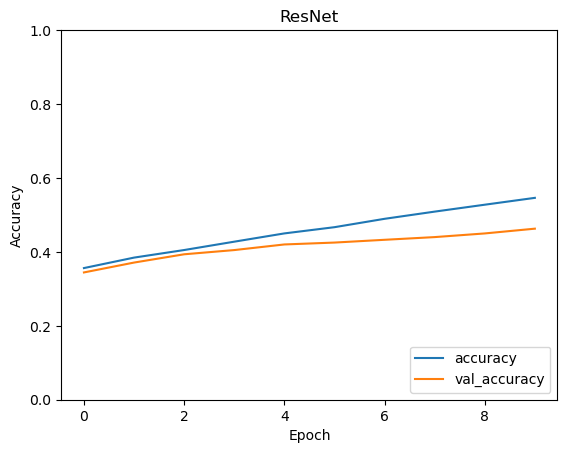

In [12]:
plt.plot(resnet.history['accuracy'], label='accuracy')
plt.plot(resnet.history['val_accuracy'], label = 'val_accuracy')
plt.title('ResNet')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)